In [42]:
import pandas as pd

notas={'Juan':9.0,'María':6.5,'Pedro':4.0,'Carmen':8.5,'Luis':5.0}

serie = pd.Series(notas)
print (serie.max(), serie.min())



9.0 4.0


In [21]:
import pandas as pd

notas={'Juan':9.0,'María':6.5,'Pedro':4.0,'Carmen':8.5,'Luis':5.0, 'pep':2, 'marc':7}

dic = {'Nom': list(notas.keys()), 'Nota': list(notas.values())}

df = pd.DataFrame(dic)
print (df)

      Nom  Nota
0    Juan   9.0
1   María   6.5
2   Pedro   4.0
3  Carmen   8.5
4    Luis   5.0
5     pep   2.0
6    marc   7.0


In [1]:
import pandas as pd
dades = {'Nom': ['Sònia', 'Laura', 'David', 'Rosa', 'Sam'],
         'Dept' : ['PROD', 'ADMIN', 'MANT', 'ADMIN', 'PROD'],
         'DiesV' : [32, 55, 20, 43, 30]}

df = pd.DataFrame(dades)
print (df) 

     Nom   Dept  DiesV
0  Sònia   PROD     32
1  Laura  ADMIN     55
2  David   MANT     20
3   Rosa  ADMIN     43
4    Sam   PROD     30


In [2]:
df[1:3]

,Nom,Dept,DiesV
1,Laura,ADMIN,55
2,David,MANT,20


In [3]:
df.loc[df['Nom'] == 'Rosa']

,Nom,Dept,DiesV
3,Rosa,ADMIN,43


In [4]:
df[df['Dept'] == "ADMIN"]

,Nom,Dept,DiesV
1,Laura,ADMIN,55
3,Rosa,ADMIN,43


In [5]:
df.sort_values(by=['DiesV'], ascending=False)

,Nom,Dept,DiesV
1,Laura,ADMIN,55
3,Rosa,ADMIN,43
0,Sònia,PROD,32
4,Sam,PROD,30
2,David,MANT,20


In [6]:
import pandas as pd
ventas = pd.DataFrame({"A":[41,32,56,18], 
                       "B":[17,54,6,78], 
                       "C":[12,13,16,18] },
                     index = ["Gen", "Feb", "Mar", "Abr"])
print (ventas)
print("SUMA")
print(ventas.sum(axis=1))
print(ventas.describe())

      A   B   C
Gen  41  17  12
Feb  32  54  13
Mar  56   6  16
Abr  18  78  18
SUMA
Gen     70
Feb     99
Mar     78
Abr    114
dtype: int64
               A          B          C
count   4.000000   4.000000   4.000000
mean   36.750000  38.750000  14.750000
std    15.945219  33.260337   2.753785
min    18.000000   6.000000  12.000000
25%    28.500000  14.250000  12.750000
50%    36.500000  35.500000  14.500000
75%    44.750000  60.000000  16.500000
max    56.000000  78.000000  18.000000


In [7]:
import random as r

#    
#------------------------------------------------- Definiciones
#
# Els observatoris i les components del vent s'agafen aleatòriament entre aquests valors
observatoris = ["MASNOU", "TIBIDABO", "BERGA", "VIC", "LLEIDA", "GIRONA", "BCN","HOSPI", "STACOL", "TARRACO"]
component = ["N","S","E","O","NE", "NO","SE","SO"]

#    
#------------------------------------------------- Procés principal
#

#------------------------------- 1. Obre arxiu
fich = open("observatoris.csv","w")
#------------------------------- 2. Grava capçalera
linia= "anyy;mes;dia;obser;ventkh;component;plujamm;tmax;tmin;tmitjana\n"
fich.write(linia)
sep = ";"
#------------------------------- 3. Genera linies de dades
for i in range (1, 5000) :

    #------------------------------- anyy; mes; dia; 
    linia = "{};{};{};".format(r.randint(1950,2018), 
                               r.randint(1,12), 
                               r.randint(1,30))  

    #    
    #------------------------------- obser; vent; component; plujamm;
    #
    linia += '"{}";{};"{}";{};'.format(observatoris[r.randint(0,9)], 
                                        r.randint(0,200), 
                                        component[r.randint(0,7)],
                                        r.randint(0,10))
    #
    #------------------------------- tmax; tmin; tmit 
    #
    tempMin = round(r.uniform(-10, 20),2)
    tempMax = round(r.uniform(tempMin, 45),2)
    tempMitjana = round((tempMax-tempMin)/2,2)
    linia +="{};{};{}".format(tempMax, tempMin, tempMitjana) + "\n"

    fich.write(linia)
#------------------------------- 4. Tanca l'arxiu
fich.close()

In [8]:
import numpy as np
import pandas as pd

df = pd.read_csv("observatoris.csv", sep=";")
df

,anyy,mes,dia,obser,ventkh,component,plujamm,tmax,tmin,tmitjana
0,2008,8,17,BCN,40,E,3,39.35,18.21,10.57
1,1981,4,25,TARRACO,154,NE,2,43.12,9.25,16.93
2,2008,2,24,GIRONA,13,O,0,18.11,-7.65,12.88
3,2002,5,2,BCN,43,NE,4,39.73,13.65,13.04
4,1976,6,15,TARRACO,188,SO,9,31.40,18.12,6.64
5,1972,10,15,BERGA,118,O,5,20.58,9.44,5.57
6,1961,11,3,MASNOU,60,N,8,36.20,-6.35,21.28
7,1966,6,14,LLEIDA,131,S,3,17.85,10.52,3.67
8,1995,6,17,BERGA,11,NO,10,-7.43,-8.19,0.38
9,1972,6,21,TIBIDABO,152,SO,9,41.64,5.05,18.30


In [9]:
print ("shape: ", df.shape)
print ("columns: ", df.columns)
print ("index: ", df.index)

shape:  (4999, 10)
columns:  Index(['anyy', 'mes', 'dia', 'obser', 'ventkh', 'component', 'plujamm', 'tmax',
       'tmin', 'tmitjana'],
      dtype='object')
index:  RangeIndex(start=0, stop=4999, step=1)


In [54]:

resultado = df[['obser','anyy','mes','tmax']][df['obser'] == "BCN"]
print (resultado)

     obser  anyy  mes   tmax
1      BCN  2011   10  39.77
5      BCN  1974    7  32.82
10     BCN  1954    7  22.21
11     BCN  2006    7  14.92
35     BCN  1967    9  14.23
37     BCN  1994    4  18.04
42     BCN  2010    8  15.52
63     BCN  1997   11  18.92
75     BCN  1953    3  22.59
97     BCN  2012    5  44.00
108    BCN  1996    5  28.84
117    BCN  1951    5  22.68
122    BCN  1950    2  25.63
131    BCN  2011    8  -3.28
136    BCN  1973    5   6.52
142    BCN  1963    5  33.75
167    BCN  2008    1  24.28
175    BCN  1956    5   5.43
180    BCN  1953    3  40.44
184    BCN  1957    4  19.32
200    BCN  1962    6  34.96
208    BCN  1964    9  14.35
210    BCN  1954    8  44.90
213    BCN  1983    3  10.11
237    BCN  2007    4  38.06
244    BCN  2002   10  31.09
253    BCN  1999    8  14.03
280    BCN  1961   10  20.59
283    BCN  1979    8  26.91
285    BCN  1999    4  38.66
...    ...   ...  ...    ...
4660   BCN  2000    1  35.71
4662   BCN  1992    6  19.58
4680   BCN  19

In [43]:
df[df['obser'] == 'BCN']
df.loc[df.obser == 'BCN'].loc[df.component == 'N'].loc[df.plujamm > 8]


,anyy,mes,dia,obser,ventkh,component,plujamm,tmax,tmin,tmitjana
35,1967,9,26,BCN,141,N,10,14.23,-8.29,11.26
480,1998,11,26,BCN,55,N,9,25.14,1.55,11.79
850,2012,6,20,BCN,120,N,9,22.25,-6.16,14.21
1171,1998,9,22,BCN,63,N,10,17.51,10.07,3.72
1253,1956,8,29,BCN,129,N,9,44.52,-4.03,24.28
2284,2005,12,9,BCN,189,N,9,37.99,18.67,9.66
2450,1953,10,13,BCN,45,N,9,44.00,18.52,12.74
2789,1965,4,10,BCN,176,N,9,43.29,0.37,21.46
4346,1992,12,27,BCN,72,N,9,14.99,-0.11,7.55
4432,1962,1,17,BCN,172,N,9,16.38,-2.77,9.57


In [12]:
plot_data = df[df['obser'] == 'BCN']
plot_data = plot_data.groupby('mes')['plujamm'].sum()
plot_data.plot(kind='bar')


In [13]:
df2 = df[df['anyy'] > 2016]
df2 = df2[['anyy', 'mes', 'plujamm']]
df2.groupby(['anyy']).sum()


,mes,plujamm
anyy,,
2017,550,406
2018,428,335


In [44]:
# Practica P01. 
# Ejercicio 1 : Carga en tu cuaderno python el siguiente fichero : obser2021.csv

import numpy as np
import pandas as pd

df = pd.read_csv("obser2021.csv", sep=";")
df

,anyy,mes,dia,obser,ventkh,component,plujamm,tmax,tmin,tmitjana
0,1973,12,9,TARRACO,191,NO,10,21.22,-2.45,11.83
1,2011,10,24,BCN,138,N,6,39.77,16.68,11.55
2,1998,6,6,VIC,192,NE,0,19.26,15.06,2.10
3,1987,1,12,MASNOU,36,NE,10,29.64,13.40,8.12
4,1954,2,10,STACOL,114,S,0,30.56,1.87,14.34
5,1974,7,2,BCN,151,E,4,32.82,19.00,6.91
6,1970,3,16,GIRONA,200,SO,9,4.26,-8.86,6.56
7,1955,3,8,VIC,30,NO,5,27.31,2.16,12.57
8,1966,9,7,BERGA,12,S,7,20.97,-1.07,11.02
9,2008,12,25,STACOL,193,E,4,27.77,10.71,8.53


In [49]:
# Ejercicio 2: Que hace esta programación ?

df2 = df[df['anyy'] > 2016]
df2 = df2[['anyy', 'mes', 'plujamm']]
df2.groupby(['anyy']).sum()


,mes,plujamm
anyy,,
2017,519,358
2018,390,344


In [48]:
# Ejercicio 3: a) Analiza los datos de los 5 últimos años con datos.

df3 = df.groupby(['anyy']).count()
df4 = df3.sort_values(by='anyy', ascending=False)
df4[0:5]



,mes,dia,obser,ventkh,component,plujamm,tmax,tmin,tmitjana
anyy,,,,,,,,,
2018,61,61,61,61,61,61,61,61,61
2017,77,77,77,77,77,77,77,77,77
2016,68,68,68,68,68,68,68,68,68
2015,71,71,71,71,71,71,71,71,71
2014,77,77,77,77,77,77,77,77,77


In [50]:
# Ejercicio 3: b)
# Localiza el observatorio con la temperatura máxima

df5a = df[df['anyy'] > 2013]
max = df5a ['tmax'].max()

df5a.loc[df5a['tmax'] == max]

,anyy,mes,dia,obser,ventkh,component,plujamm,tmax,tmin,tmitjana
2576,2014,11,27,TARRACO,8,N,0,44.99,17.59,13.7


In [18]:
# Ejercicio 3: c)
# Localiza el observatorio con la temperatura mínima en Febrero

df5aFeb = df5a[df5a['mes'] == 2]
min = df5aFeb ['tmin'].min()

df5aFeb.loc[df5aFeb['tmin'] == min]

,anyy,mes,dia,obser,ventkh,component,plujamm,tmax,tmin,tmitjana
2735,2017,2,26,TARRACO,89,SO,4,14.97,-9.23,12.1


In [19]:
# Ejercicio 3: d)
# Observatorio, día mes y año con el viento más fuerte

vent_max = df5a ['ventkh'].max()
df5a.loc[df5a['ventkh'] == vent_max].iloc [:,[3,2,1,0,4]]


,obser,dia,mes,anyy,ventkh
1266,LLEIDA,5,5,2014,200
2406,BERGA,26,8,2014,200


In [81]:
# Ejercicio 4: Queremos saber las temperaturas máximas de cada mes en los distintos observatorios y en los distintos años.


df4a = df.groupby(['obser','anyy', 'mes']).agg({'tmax': ['max']})
df4a



tmax
                  max
obser anyy mes       
BCN   1950 2    25.63
           5    40.97
           6    25.84
           8    18.34
           9    24.08
           10   41.05
           12   29.02
      1951 2    23.70
           5    22.68
           11    7.44
      1952 3    25.75
           4    17.98
           7    10.28
           8    41.95
           9    42.73
           12   10.52
      1953 1    17.34
           3    40.44
           4    12.11
           7    29.63
           8    11.95
           9     5.65
           10   44.00
      1954 1    34.36
           6    41.68
           7    22.21
           8    44.90
           9    33.35
           10   25.78
           11   32.84
...               ...
VIC   2012 11   34.09
      2013 1     6.68
           3    16.47
           4    25.87
           5    21.53
           12   33.97
      2014 1    37.93
           2    27.39
           4    35.31
           5     2.52
           8    22.68
           11   32.36
      2015 2     9.37
           3    14.61
           4    43.19
           12   22.45
      2016 1    38.97
           2    28.93
           5    24.74
           6    27.10
           7    12.75
           8    19.67
           10   42.65
      2017 1    27.34
           3    14.74
           4    16.37
           10   29.60
      2018 1    25.73
           2    42.04
           4    25.47

[3800 rows x 1 columns]

,tmax
,max
anyy,
1960,44.98
1961,44.20
1962,43.62
1963,44.44
1964,44.33
1965,43.36
1966,41.68
1967,44.24


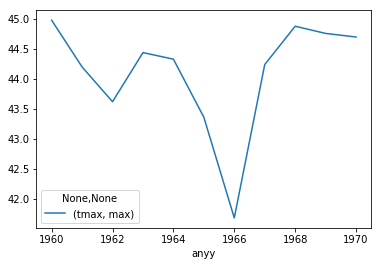

In [82]:
# Cómo presentarías los datos ?  --> DEMASIADOS DATOS DECIDIR ENTRE ANALIZAR POR OBSERVATORIO O POR AÑO
df5 = df[df.anyy.between(1960, 1970)]
df5 = df5.groupby(['anyy']).agg({'tmax': ['max']})
df5.plot()

df5
#

In [21]:
# Que criterio utilizarías para decidir cual es el año más frío ?

df4b = df.groupby(['anyy']).mean()
df4b.sort_values(by=['tmin'])[0:1]

,mes,dia,ventkh,plujamm,tmax,tmin,tmitjana
anyy,,,,,,,
1957,7.0,15.493333,101.68,4.4,20.940533,1.889333,9.525867
